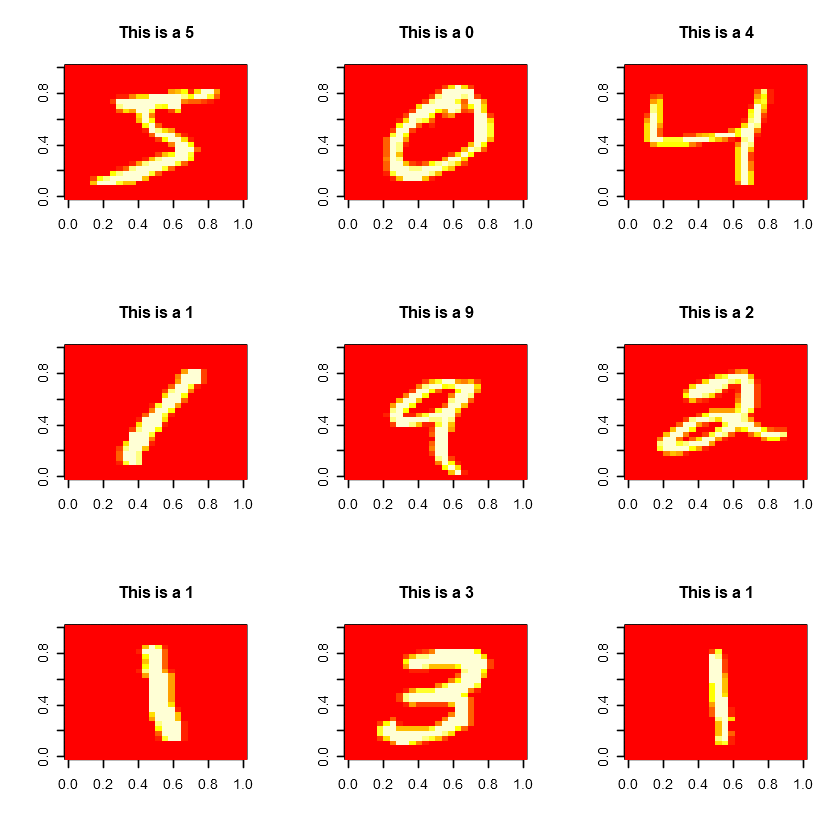

In [3]:
###Reading dataset
require(data.table)
mnist_data=fread('C:\\Users\\HP\\Downloads\\mnist_train.csv')

##Building a 3*3 grid
par(mfrow=c(3,3))
for (i in 1:9)
{
##Changing i-th row to matrix
 mat=matrix(as.numeric(mnist_data[i,785:2,with=F]),nrow = 28,ncol=28,byrow = F)
##Inverting row order
mat=mat[nrow(mat):1,]
##plot
 image(mat,main=paste0('This is a ',mnist_data[i,1,with=F]))
}

In [4]:
which(mnist_data[,sapply(.SD,FUN = function(x){min(x)==max(x)}),.SDcols=2:ncol(mnist_data)])

1x1   1x2   1x3   1x4   1x5   1x6   1x7   1x8   1x9  1x10  1x11  1x12  1x17 
    1     2     3     4     5     6     7     8     9    10    11    12    17 
 1x18  1x19  1x20  1x21  1x22  1x23  1x24  1x25  1x26  1x27  1x28   2x1   2x2 
   18    19    20    21    22    23    24    25    26    27    28    29    30 
  2x3   2x4  2x25  2x26  2x27  2x28   3x1   3x2  3x27  3x28   4x1   4x2  4x28 
   31    32    53    54    55    56    57    58    83    84    85    86   112 
  5x1   6x1   6x2   7x1  18x1  21x1  24x1  24x2 24x28  25x1  25x2 25x28  26x1 
  113   141   142   169   477   561   645   646   672   673   674   700   701 
 26x2 26x28  27x1  27x2  27x3 27x27 27x28  28x1  28x2  28x3  28x4 28x25 28x26 
  702   728   729   730   731   755   756   757   758   759   760   781   782 
28x27 28x28 
  783   784

In [5]:
mnist_data=mnist_data[,-(which((1:784)%%28<=2|(1:784)%%28>=26|1:784%/%28<=2|1:784%/%28>=26)+1),
with=F]

In [6]:
PCA1=prcomp(mnist_data[,(2:ncol(mnist_data)),with=F],center = T,scale. = F)

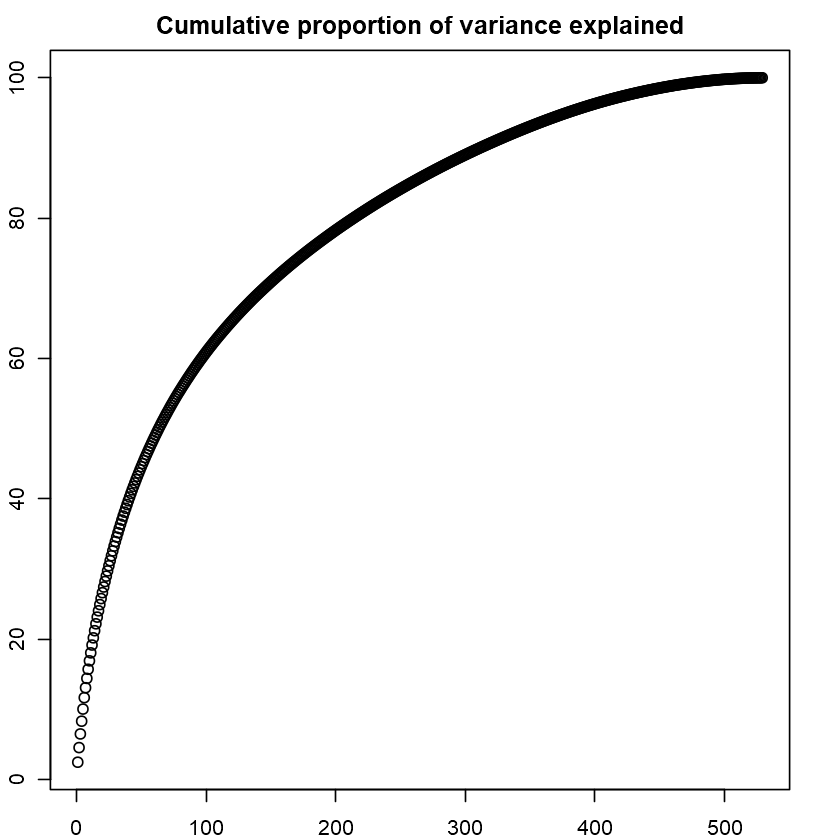

In [7]:
par(mfrow=c(1,1),mar=c(2.1,2.1,2.1,2.1))
plot(cumsum(PCA1$sdev)/sum(PCA1$sdev)*100,main='Cumulative proportion of variance explained')

In [8]:
projected=scale(mnist_data[,(2:ncol(mnist_data)),with=F], PCA1$center, PCA1$scale) %*% PCA1$rotation

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2

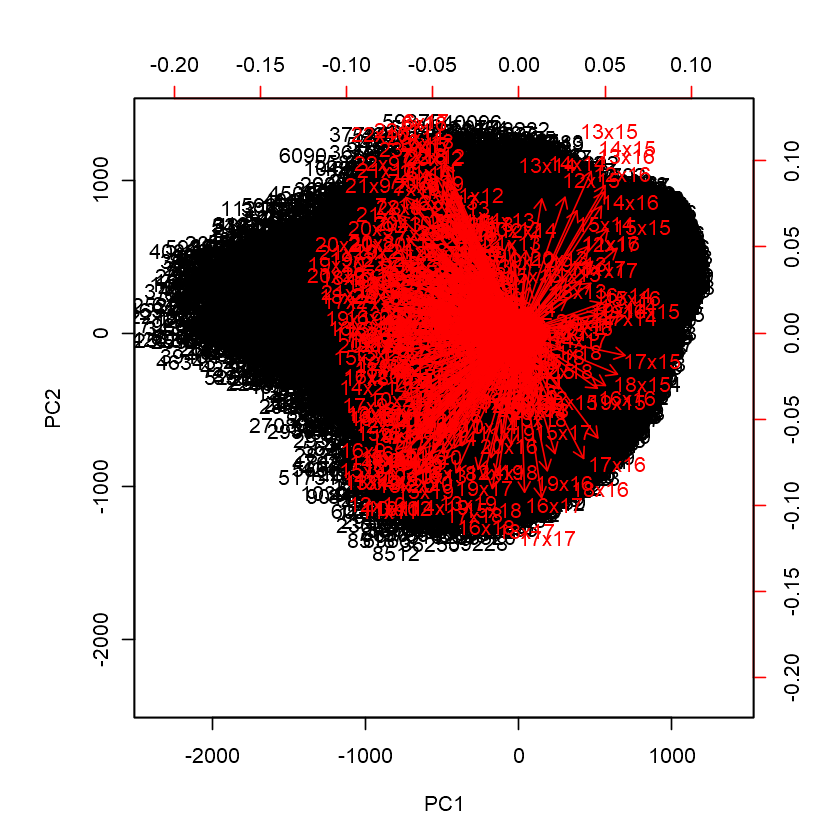

In [11]:
biplot(PCA1, scale = 0)

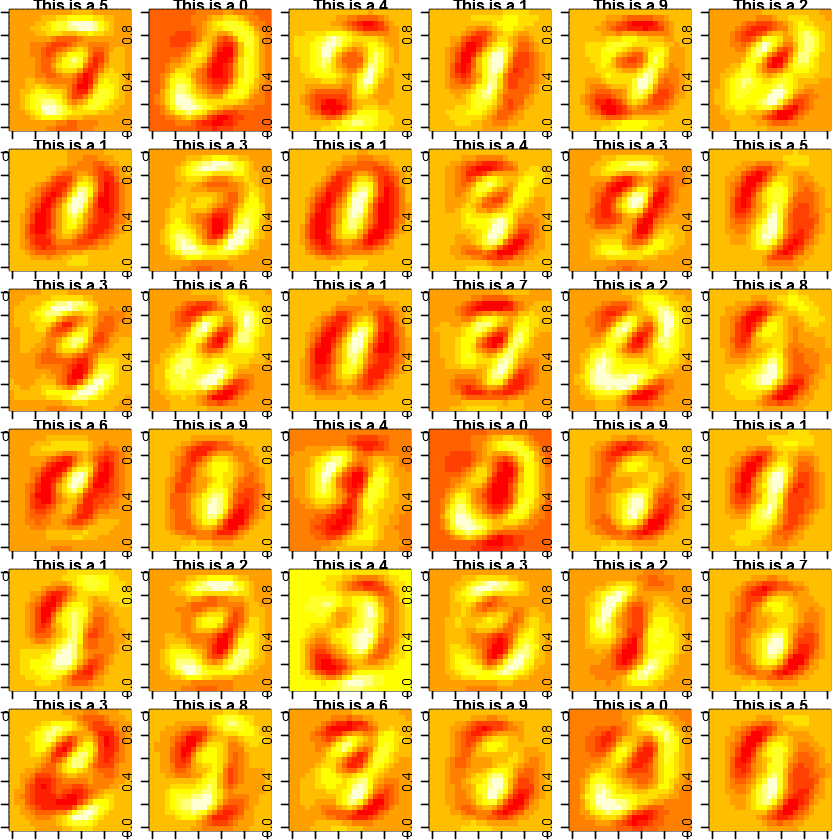

In [23]:
###Keeping only the three main dimensions
n_dim=3
##Projecting the data back using only the 3 principal components
coord_x=data.table(mnist_data$label,projected[,1:n_dim]%*%t(PCA1$rotation)[1:n_dim,])
par(mfrow=c(6,6),mar=c(0.6,0.6,0.6,0.6))
##Plotting 36 observations
for (i in 1:36)
{
 mat=matrix(as.numeric(coord_x[i,530:2,with=F]),nrow = 23,ncol=23,byrow = F)
mat=mat[nrow(mat):1,]
image(mat,main=paste0('This is a ',coord_x[i,1,with=F]))
}